In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [ ]:
Data Preparation and Exploration
1.	Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.
2.	Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.
3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.


In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
df = pd.read_csv(r"D:\Admin\Downloads\www.csv", index_col=0, parse_dates=True)
df

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-10,0.718494
2010-07-10,0.721839
2010-08-10,0.723197


In [7]:
df['Ex_rate']

date
1990-01-01    0.785500
1990-02-01    0.781800
1990-03-01    0.786700
1990-04-01    0.786000
1990-05-01    0.784900
                ...   
2010-06-10    0.718494
2010-07-10    0.721839
2010-08-10    0.723197
2010-09-10    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64

In [ ]:
#Data visualization with the help of the line plot

<Axes: xlabel='date', ylabel='Ex_rate'>

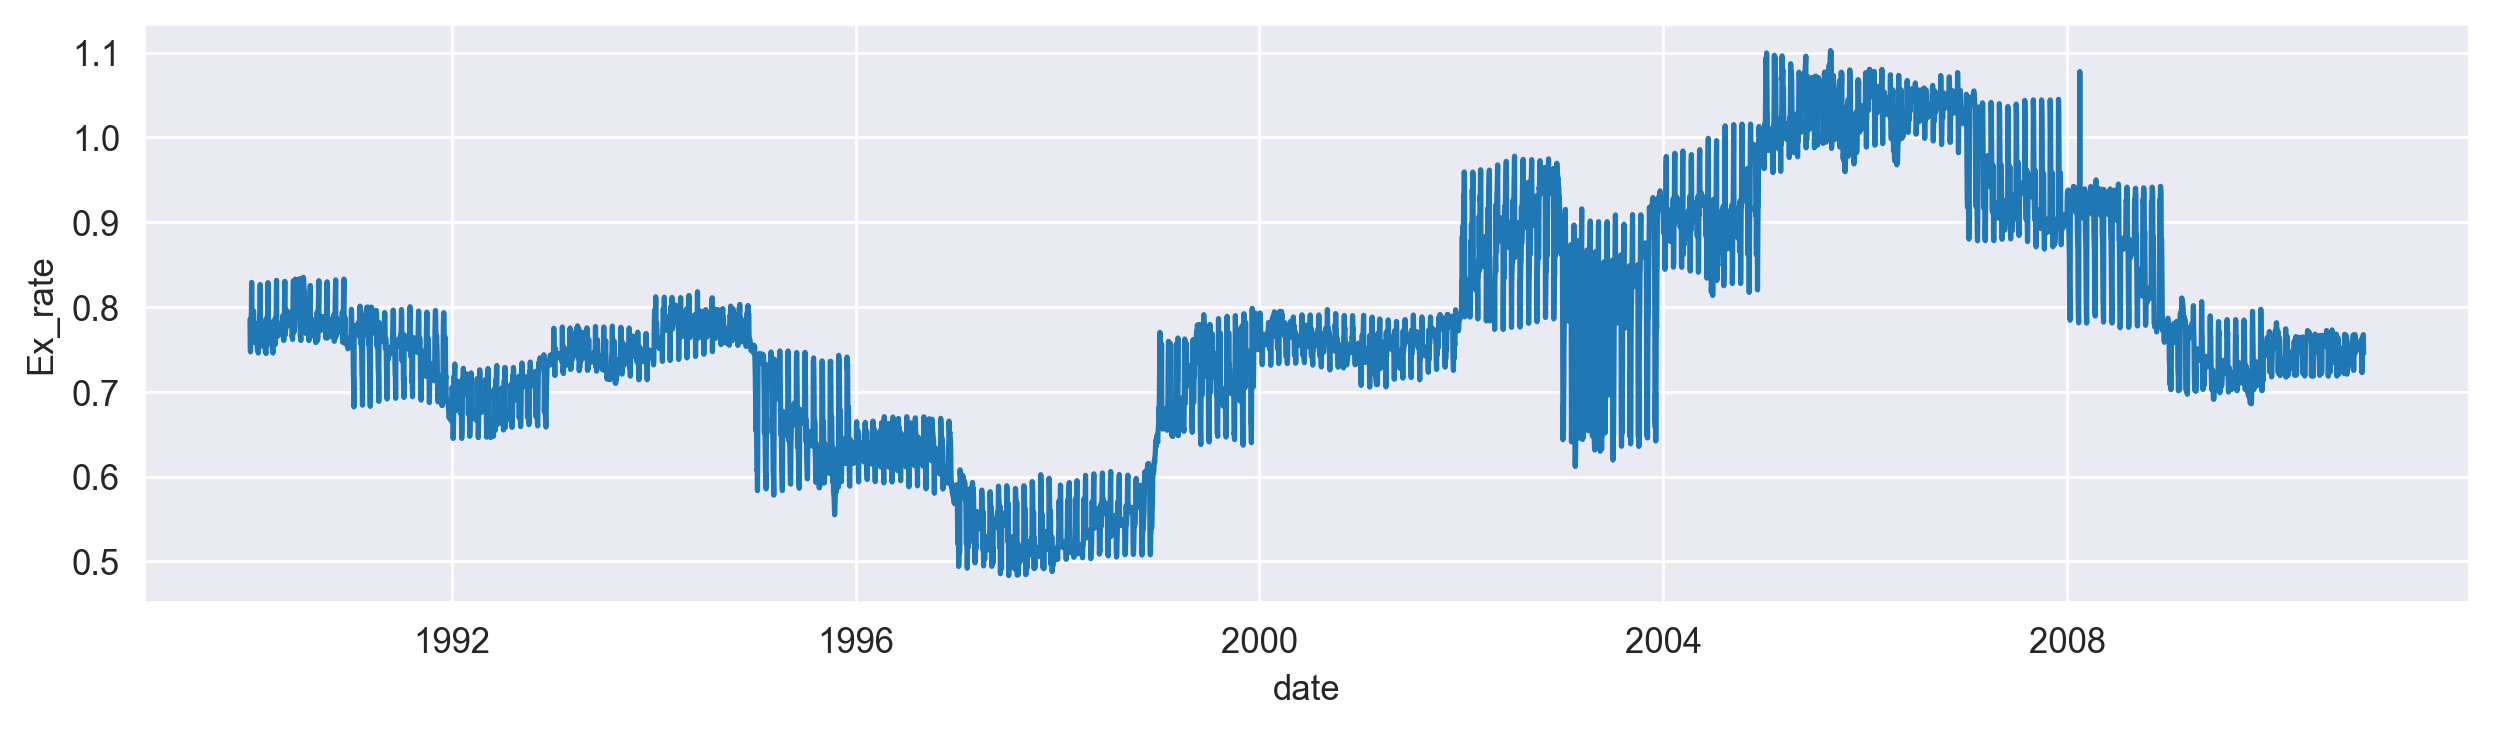

In [43]:
plt.figure(figsize=(12,3))
sns.lineplot(x="date",y="Ex_rate",data=df)

<Axes: xlabel='date'>

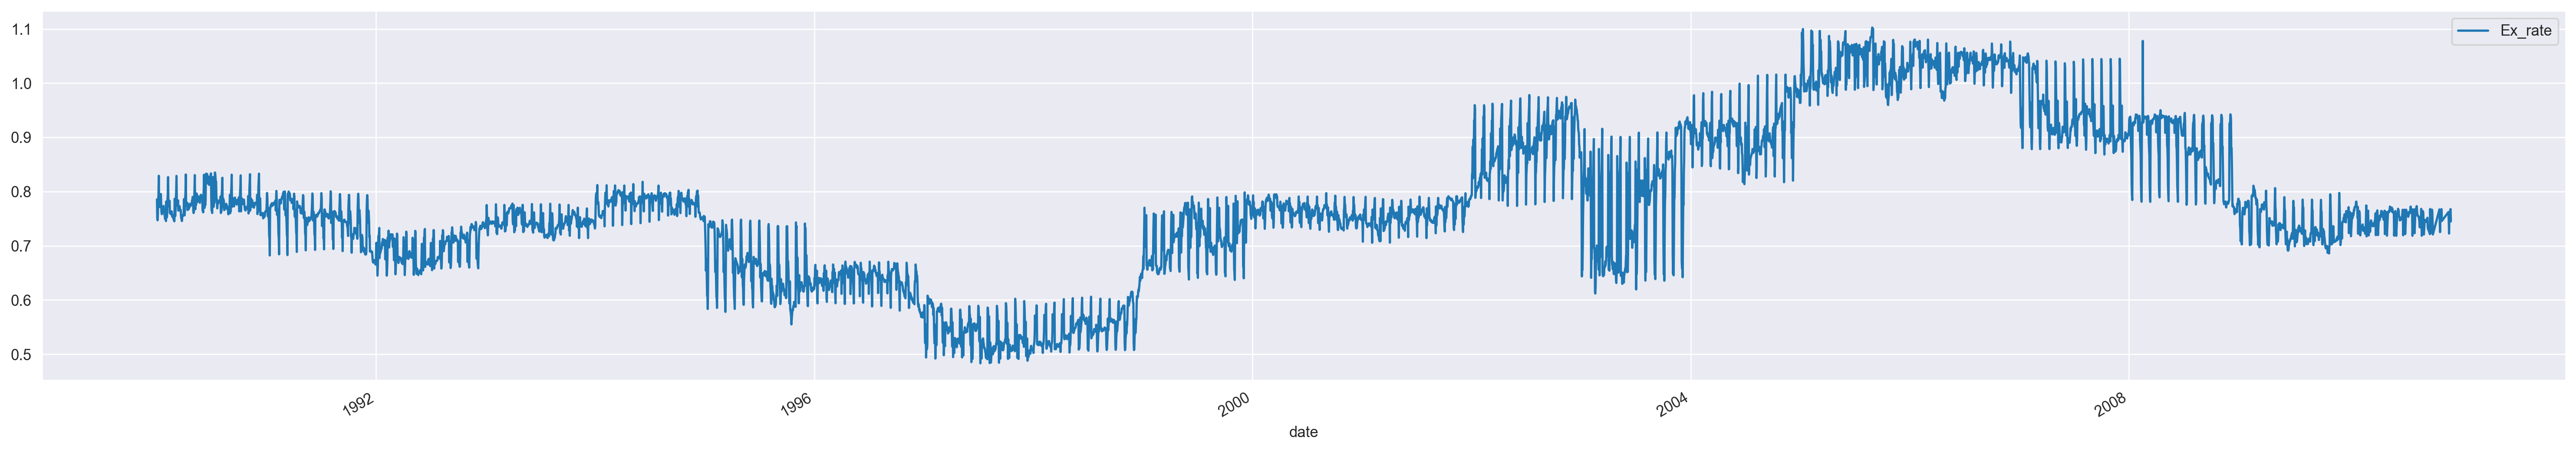

In [9]:
df.plot()

<Axes: xlabel='date'>

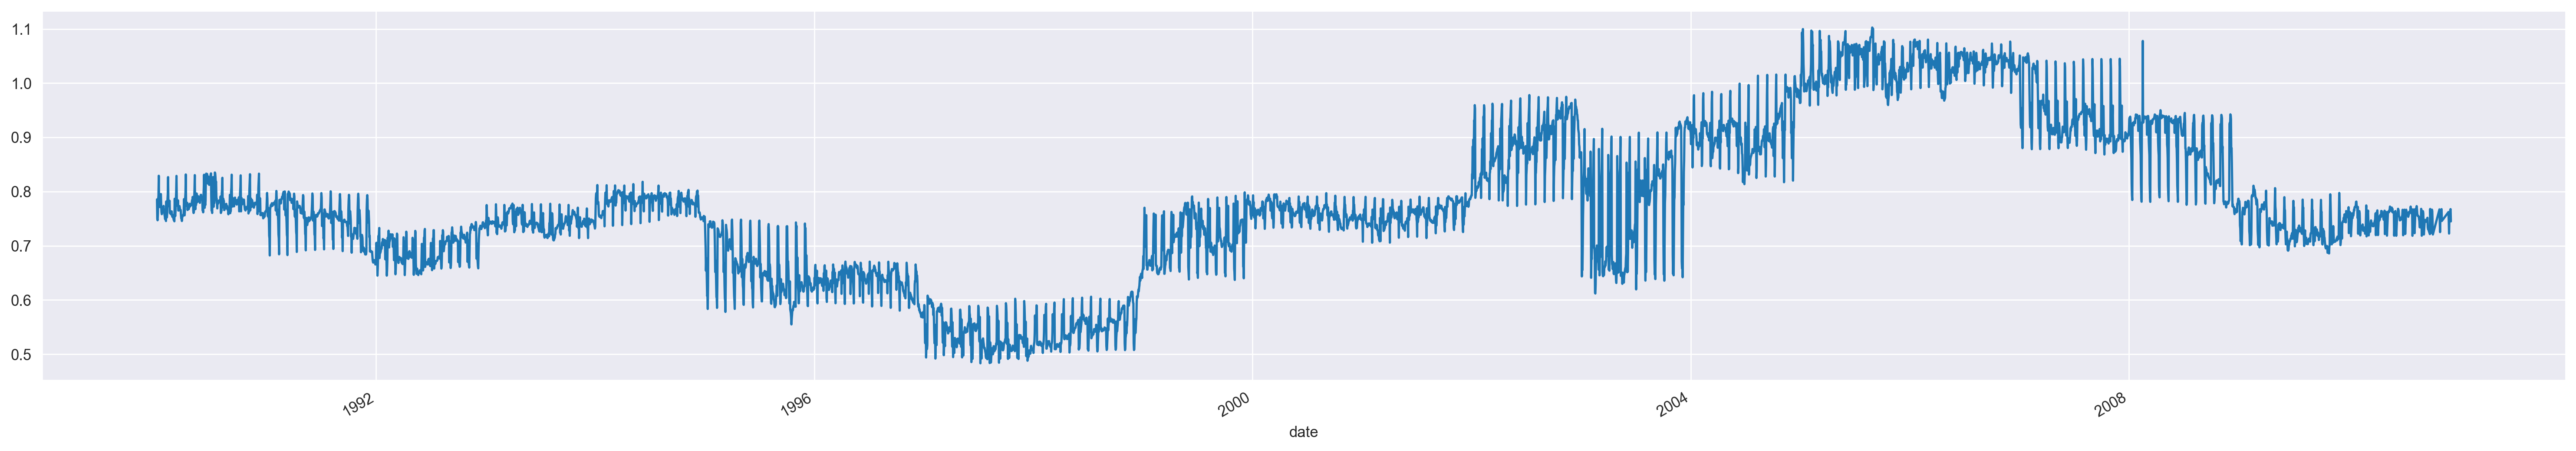

In [13]:
df['Ex_rate'].plot()

In [ ]:
#1.	Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.
2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


In [15]:
adfuller(df['Ex_rate'])[1]

0.44923273535983155

In [17]:
order = auto_arima(df['Ex_rate'])

In [18]:
order

ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
df.shape

(7588, 1)

In [23]:
train = df.iloc[:-30]
test = df.iloc[-30:]

In [25]:
train.shape

(7558, 1)

In [27]:
train

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-09,0.747831
2010-07-09,0.746436
2010-08-09,0.738662


In [29]:
test.shape

(30, 1)

In [31]:
model = ARIMA(train['Ex_rate'], order=(1, 0, 5)).fit()

In [33]:
test

,Ex_rate
date,
2010-11-09,0.745796
2010-12-09,0.745045
2010-09-13,0.747692
2010-09-14,0.745601
2010-09-15,0.747680
2010-09-16,0.744602
2010-09-17,0.744158
2010-09-18,0.745184
2010-09-19,0.744990


In [35]:
train.tail()

,Ex_rate
date,
2010-06-09,0.747831
2010-07-09,0.746436
2010-08-09,0.738662
2010-09-09,0.741125
2010-10-09,0.744546


In [37]:
test

,Ex_rate
date,
2010-11-09,0.745796
2010-12-09,0.745045
2010-09-13,0.747692
2010-09-14,0.745601
2010-09-15,0.747680
2010-09-16,0.744602
2010-09-17,0.744158
2010-09-18,0.745184
2010-09-19,0.744990


In [47]:
train

,Ex_rate
date,
1990-01-01,0.785500
1990-02-01,0.781800
1990-03-01,0.786700
1990-04-01,0.786000
1990-05-01,0.784900
...,...
2010-06-09,0.747831
2010-07-09,0.746436
2010-08-09,0.738662


In [39]:
ypred = model.predict(start =1791, end = 1820)
ypred

date
1994-11-27    0.776969
1994-11-28    0.777867
1994-11-29    0.776716
1994-11-30    0.775005
1994-01-12    0.774373
1994-02-12    0.774254
1994-03-12    0.782708
1994-04-12    0.780043
1994-05-12    0.766738
1994-06-12    0.764242
1994-07-12    0.763935
1994-08-12    0.764278
1994-09-12    0.763012
1994-10-12    0.758606
1994-11-12    0.760032
1994-12-12    0.759004
1994-12-13    0.760662
1994-12-14    0.760799
1994-12-15    0.761312
1994-12-16    0.761575
1994-12-17    0.758411
1994-12-18    0.753147
1994-12-19    0.751544
1994-12-20    0.748986
1994-12-21    0.749804
1994-12-22    0.750422
1994-12-23    0.749771
1994-12-24    0.752108
1994-12-25    0.752102
1994-12-26    0.750943
Name: predicted_mean, dtype: float64

In [41]:
print(np.sqrt(mean_squared_error(test['Ex_rate'], ypred)))

0.030626728716814745


In [ ]:
#Model Building - Exponential Smoothing
1.	Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).
2.	Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.
3.	Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data


In [63]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [71]:
model = ExponentialSmoothing(
    df['Ex_rate'], 
    seasonal_periods=12, 
    trend='add', 
    seasonal='add', 
    initialization_method='estimated'
)
hw_fit = model.fit()

In [75]:
(hw_fit.params)

{'smoothing_level': 0.870094378980175,
 'smoothing_trend': 0.0,
 'smoothing_seasonal': 2.230124486714544e-17,
 'damping_trend': nan,
 'initial_level': 0.7859037187180103,
 'initial_trend': -6.3581345378576314e-06,
 'initial_seasons': array([-0.00077577, -0.0007304 , -0.00074534, -0.00048778, -0.00052989,
        -0.00072752, -0.00104495, -0.00075986, -0.00091853, -0.00077399,
        -0.00069193, -0.00097026]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [ ]:
#forecasting

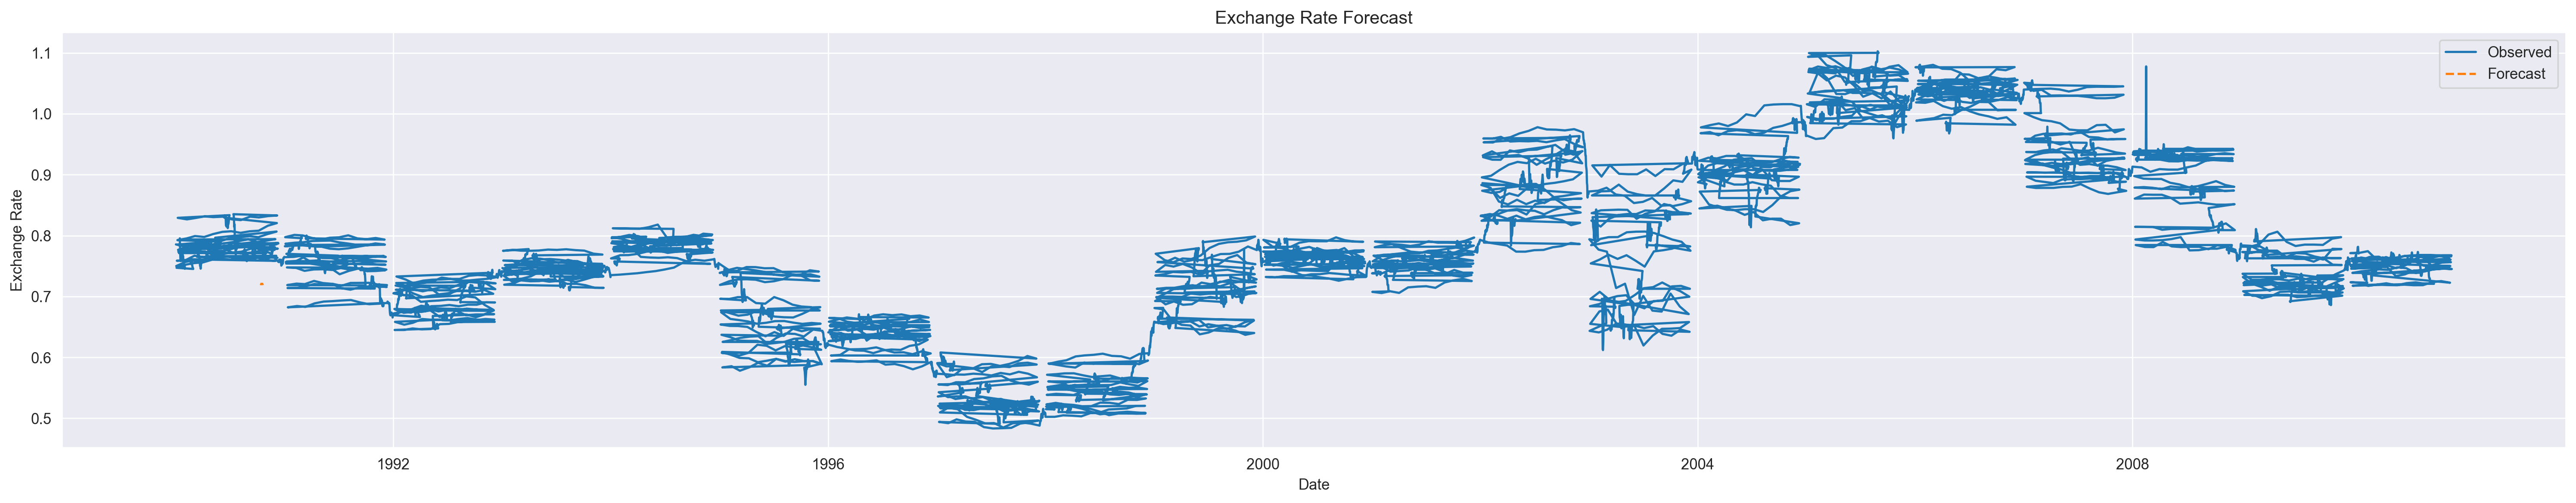

In [79]:
forecast = hw_fit.forecast(steps=12)

# Plot the data and forecast
plt.plot(df.index, df['Ex_rate'], label='Observed')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()